## Hoja de trabajo 3
Gabriel García - 21352      
Javier Prado - 21486

1. Descargue los conjuntos de datos.    
2. Haga un análisis exploratorio extenso de los datos. Explique bien todos los hallazgos. No ponga solo gráficas y código. Debe llegar a conclusiones interesantes para poder predecir. Explique el preprocesamiento que necesitó hacer.            
3. Incluya un análisis de grupos en el análisis exploratorio. Explique las características de los grupos.                   
4. Divida el set de datos preprocesados en dos conjuntos: Entrenamiento y prueba. Describa 
el criterio que usó para crear los conjuntos: número de filas de cada uno, estratificado o n,
balanceado o no, etc. Explique en su documento como estan distribuidas las clase                               
5. 5labore el árbol de clasificación utilizando el conjunto de entrenamiento y la variable 
respuesta. Explique los resultados a los que llega. Muestre el modelo gráficamente. E 
experimento debe ser reproducible por lo que debe fijar que los conjuntos  e
entrenamiento y prueba sean los mismos siempre que se ejecute el código.        ódigo.
6. Utilice el modelo con el conjunto de prueba y determine la eficiencia del algorit o para
clasificar y predecir, en dependencia de las características de la variable re                      spuesta.
7. Haga un análisis de la eficiencia del algoritmo usando una matriz de confusión para el árbol
de clasificación. Tenga en cuenta la efectividad, donde el algoritmo se equivocó  ás, donde
se equivocó menos y la importancia que tienen l                                    os errores.
8. Analice el desempeño del árbol d                       e regresión.
9. Realice pre-poda y post-poda y expliqu.e l                 os resultados

## Eda

In [56]:
#Importar librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [57]:
df = pd.read_csv("medicina.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Height,Weight,Exercise,HealthyEating
0,23,F,HIGH,HIGH,25.355,drugY,167.494363,107.766413,0.0,0.0
1,47,M,LOW,HIGH,13.093,drugC,171.866737,43.332084,1.0,0.0
2,47,M,LOW,HIGH,10.114,drugC,178.318211,72.814734,1.0,1.0
3,28,F,NORMAL,HIGH,7.798,drugX,180.900052,56.813694,1.0,0.0
4,61,F,LOW,HIGH,18.043,drugY,167.937282,81.902153,1.0,0.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            500 non-null    int64  
 1   Sex            500 non-null    object 
 2   BP             500 non-null    object 
 3   Cholesterol    500 non-null    object 
 4   Na_to_K        500 non-null    float64
 5   Drug           500 non-null    object 
 6   Height         500 non-null    float64
 7   Weight         500 non-null    float64
 8   Exercise       500 non-null    float64
 9   HealthyEating  500 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 39.2+ KB


In [59]:

# Cambiar los datos cualitativos a cuantitativos
bp_map ={"LOW": 0, "NORMAL": 1, "HIGH": 2}
sex_map = {"F": 0, "M": 1}
col_map = {"LOW": 0, "NORMAL": 1, "HIGH": 2}
drug_map = {"drugA": 0, "drugB": 1, "drugC": 2, "drugX": 3, "drugY": 4}
df["BP"] = df["BP"].map(bp_map)
df["Sex"] = df["Sex"].map(sex_map)
df["Drug"] = df["Drug"].map(drug_map)
df["Cholesterol"] = df["Cholesterol"].map(col_map)
print(df)

     Age  Sex  BP  Cholesterol  Na_to_K  Drug      Height      Weight  \
0     23    0   2            2   25.355     4  167.494363  107.766413   
1     47    1   0            2   13.093     2  171.866737   43.332084   
2     47    1   0            2   10.114     2  178.318211   72.814734   
3     28    0   1            2    7.798     3  180.900052   56.813694   
4     61    0   0            2   18.043     4  167.937282   81.902153   
..   ...  ...  ..          ...      ...   ...         ...         ...   
495   52    1   0            1   32.922     4  175.201763   75.983105   
496   59    1   2            2   13.935     1  174.919749   69.321768   
497   48    0   0            2   15.036     4  202.933444   44.752291   
498   68    1   2            2   11.009     1  173.761485   87.631295   
499   47    0   1            1    6.683     3  175.329155   83.476504   

     Exercise  HealthyEating  
0         0.0            0.0  
1         1.0            0.0  
2         1.0            1.0  

## Pre Punning

In [60]:
df_normalized = df
x = df_normalized.drop(columns=["Cholesterol"])
y = df_normalized["Cholesterol"]
x.shape, y.shape

((500, 9), (500,))

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y)
x_train.shape, x_test.shape

((375, 9), (125, 9))

In [62]:
clf = DecisionTreeClassifier()

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
clf.fit(x_train, y_train_encoded)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

[Text(0.2189764492753623, 0.9666666666666667, 'Age <= 21.5\ngini = 0.5\nsamples = 375\nvalue = [185.0, 190.0]\nclass = NORMAL'),
 Text(0.043478260869565216, 0.9, 'Cholesterol <= 36.413\ngini = 0.291\nsamples = 34\nvalue = [28, 6]\nclass = HIGH'),
 Text(0.028985507246376812, 0.8333333333333334, 'Na_to_K <= 1.5\ngini = 0.175\nsamples = 31\nvalue = [28, 3]\nclass = HIGH'),
 Text(0.014492753623188406, 0.7666666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = NORMAL'),
 Text(0.043478260869565216, 0.7666666666666667, 'Cholesterol <= 9.182\ngini = 0.067\nsamples = 29\nvalue = [28, 1]\nclass = HIGH'),
 Text(0.028985507246376812, 0.7, 'Cholesterol <= 8.917\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = HIGH'),
 Text(0.014492753623188406, 0.6333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = HIGH'),
 Text(0.043478260869565216, 0.6333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = NORMAL'),
 Text(0.057971014492753624, 0.7, 'gini = 0.0\nsamples = 27\n

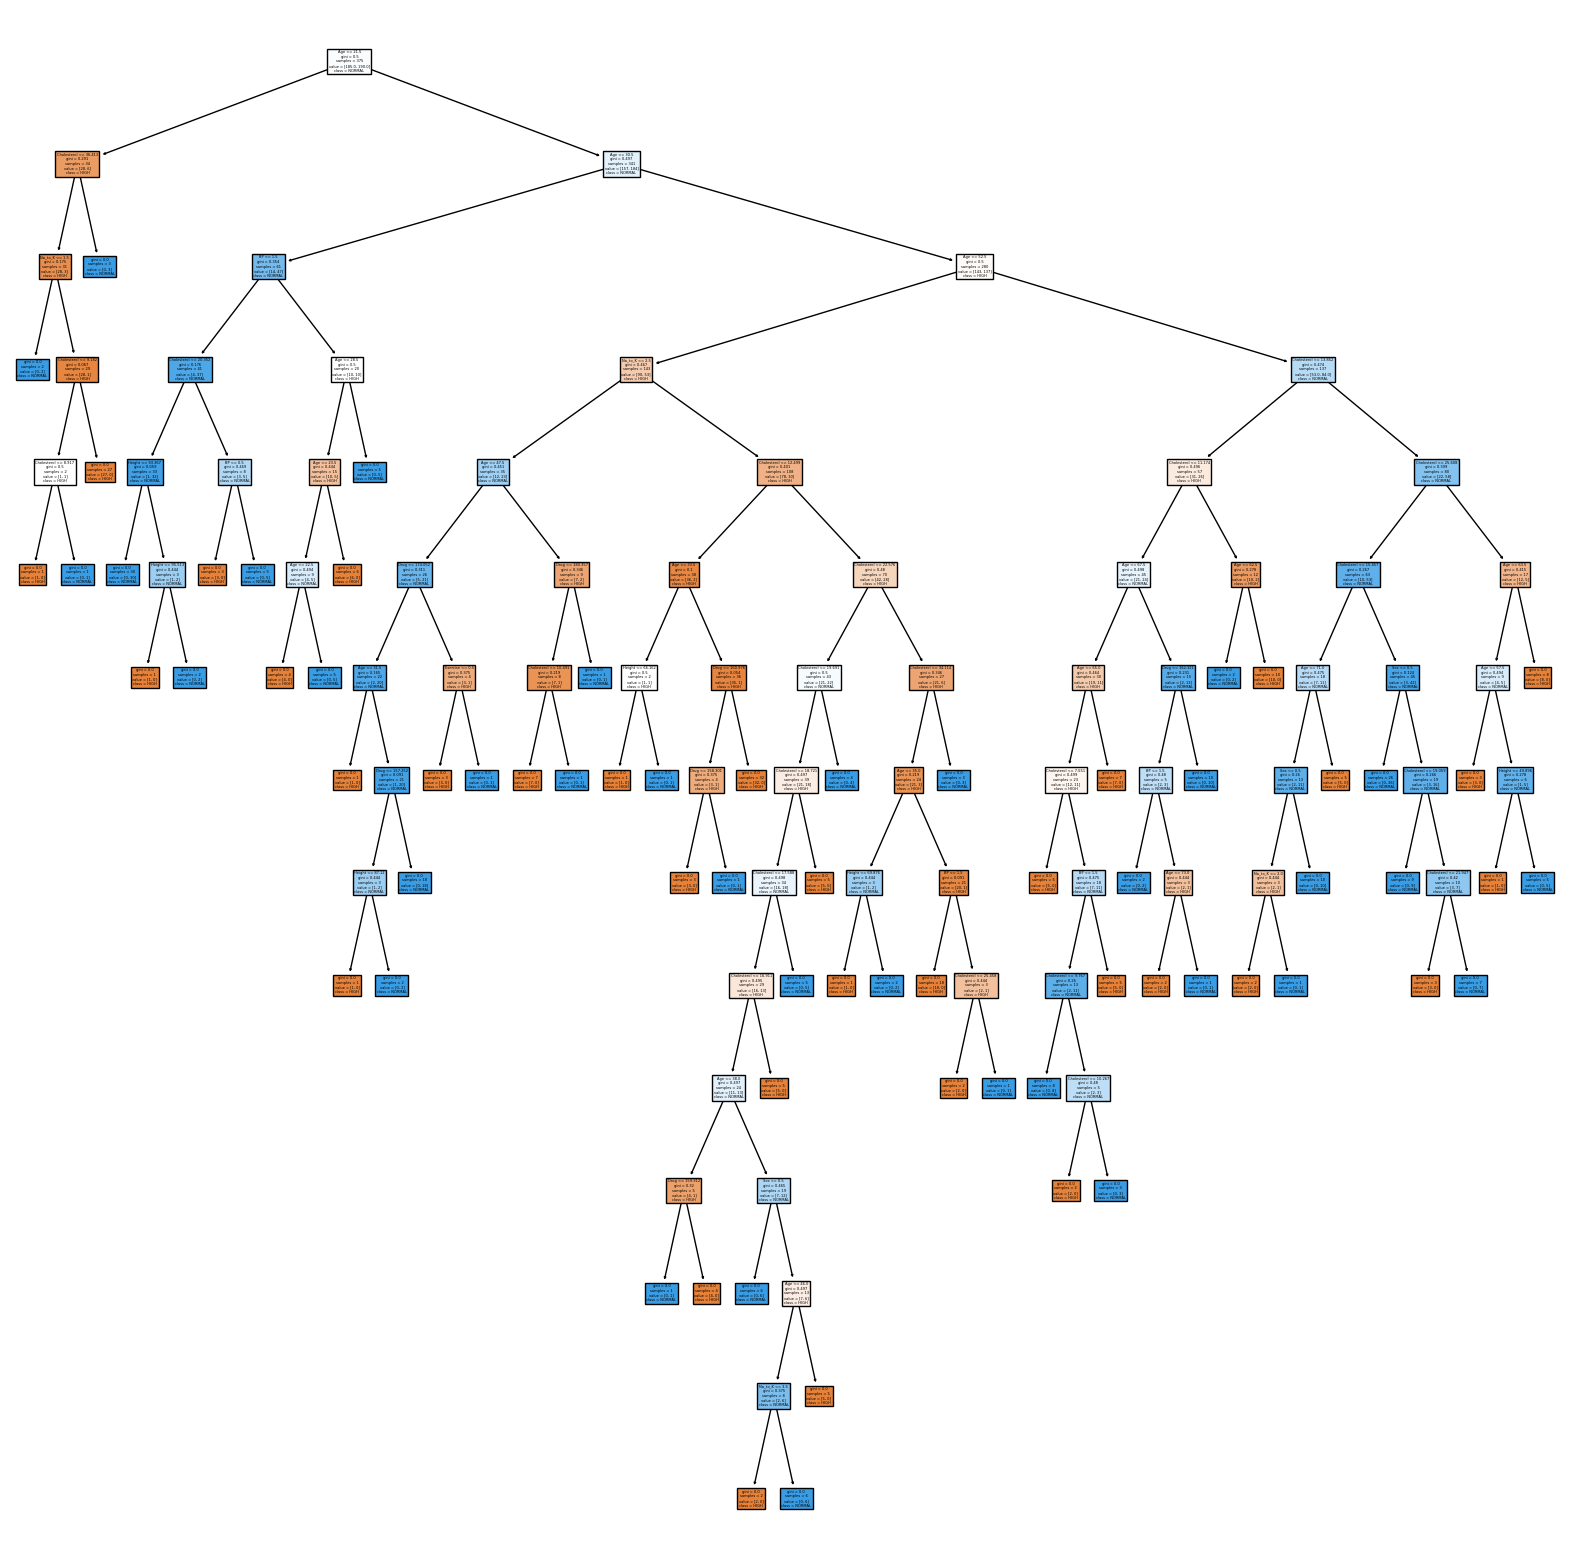

In [63]:
plt.figure(figsize=(20,20))
features = df_normalized.columns
classes = ['HIGH', 'NORMAL', 'LOW']
tree.plot_tree(clf, feature_names = features, class_names = classes, filled = True)


In [66]:
def confusion_matrix_plot(y_train_pred, y_train, type):
    print(type, "Matriz")
    mdf = confusion_matrix(y_train_pred, y_train)
    sns.heatmap(mdf, annot = True, yticklabels = classes, xticklabels = classes, cmap = "Blues", fmt = "g")
    plt.tight_layout


test_score = accuracy_score(y_test_pred, y_test_encoded)
train_score = accuracy_score(y_train_pred, y_train_encoded)

print("Acuracy en Train: ", train_score)
print("Acuracy en Test: ", test_score)

Acuracy en Train:  1.0
Acuracy en Test:  0.848


Entrenamiento Matriz


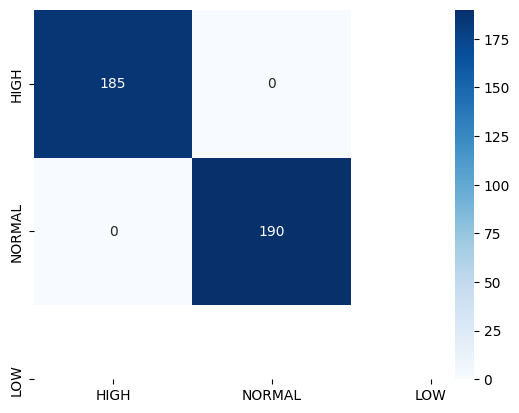

In [67]:
confusion_matrix_plot(y_train_pred, y_train_encoded, 'Entrenamiento')